# Pandas Visualization

[worksheet in Colab](https://colab.research.google.com/github/tychen742/dsm/blob/main/chapters/06-visualization/0601-vis-pd-worksheet.ipynb)

Pandas offers a simple, high-level interface for creating plots directly from Series and DataFrame objects. It builds on Matplotlib behind the scenes, allowing you to make quick, readable plots with calls like `df.plot()` or `ser.plot()`. You can easily produce line, bar/stacked bar, area, scatter, box, histogram, KDE, hexbin, and pie charts while using your index (including datetime) and column labels. 

In this section, you will learn:

1. **Plotting***: Plotting different plots using either the `df.plot()` method with the `kind` parameter or the direct plotting methods. For example, for histograms:
    1. `df.plot.hist()`: Uses Pandas’ unified `.plot()` interface (which wraps Matplotlib) to draw a histogram.
    2. `df.plot(kind='hist')`: The same as df.plot.hist(); a generic form of the same call.
    3. Pandas has two top-level plotting methods: `df.hist()` (a quick wrapper around Matplotlib’s `plt.hist()` for all numeric columns) and `df.boxplot()`.



| Method                 | Applies to          | Subplots              | Overlays Multiple Columns | Based On                 | Typical Use                           |
|:---------------------- |:------------------- |:--------------------- |:------------------------- |:------------------------ |:------------------------------------- |
| `df.hist()`            | DataFrame only      | Yes (grid of plots) | No                      | `plt.hist()`             | Quick overview of all numeric columns |
| `df.plot.hist()`       | DataFrame or Series | Single plot         | Yes                     | Pandas `.plot()` wrapper | Custom, combined histograms           

2. **Custom parameters**: Most plotting calls accept `Matplotlib` keyword arguments and return a Matplotlib Axes object for further customization. Often used parameters from pandas API reference ([pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)) include:
   1. `data`: Series or DataFrame. The object for which the method is called.
   2. `x`: label or position, default None. Only used if data is a DataFrame.
   3. `y`: label, position or list of label, positions, default None. Allows plotting of one column versus another. Only used if data is a DataFrame.
   4. `kind`: str. The kind of plot to produce: line (default), bar, barh, hist, box, kde/density, area, pie, scatter (DataFrame only), hexbin (DataFrame only).
   5. `ax`
   6. `figsize` 
   7. `use_index`
   8. `title`
   9. ticks (xticks and yticks): sequence. Values to use for ticks. 
   10. lim (`xlim` and `ylim`): 2-tuple/list. Set the limits of the axes.    
   11. label (`xlabel` and `ylabel`: Name to use for the label on axis (default to index name).
   12. `coloarmap`: str or matplotlib colormap object
   13. `stacked`: bool, default False in line and bar plots, and True in area plot. If True, create stacked plot.
   14. **kwargs ([matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)): 
       1.  `lw` 
       2.  `alpha` 
  

3. **style sheets**: Style the plots to look globally with `plt.style.use(...)`.
  
4. **color & size**: 
    - For scatter plots you can color by a column (`c`) or 
    - size by an array (`s=df['col']*scale`) and 
    - use `cmap` for colormaps.

5. **fine-tuning**: For large or dense data, consider hexbin or KDE plots instead of scatter.

6. **Plot Types**
The `pandas.DataFrame.plot` API lists 11 plots to be used with the `kind` parameter: The kind of plot to produce: `line`(default), `bar`, `barh` (horizontal bar plot), `hist`, `box`, `kde` (`density`), `area`, `pie`, `scatter`, `hexbin`. These plots can be summarized as:

| Plot Type             | Method                                                  | Description                              | Best For                              |
| --------------------- | ------------------------------------------------------- | ---------------------------------------- | ------------------------------------- |
| **area**              | `.plot.area()`                                          | Filled area under curve                  | Cumulative trends                     |
| **bar**               | `.plot.bar()`                                           | Vertical bars                            | Category comparisons                  |
| **barh**              | `.plot.barh()`                                          | Horizontal bars                          | Long category labels                  |
| **box**               | `.plot.box()`                                           | Box-and-whisker plot                     | Distribution + outliers               |
| **density**/**kde**  |  `.plot.density()`/`.plot.kde()`                        | Kernel density estimate                  | Smoothed distribution                 |
| **hexbin**            | `.plot.hexbin(x='col1', y='col2')`                      | Hexagonal binning of points              | Dense scatter data (DataFrame only)                    |
| **hist**              | `.plot.hist()`                                          | Histogram                                | Distribution of a numeric variable    |
 **line**              | `.plot.line()`                                          | Default; connects data points with lines | Time series, trends                   |
| **pie**               | `.plot.pie()`                                           | Pie chart                                | Part-to-whole breakdown (Series only) |
| **scatter**           | `.plot.scatter(x='col1', y='col2')`                     | Dots for two variables                   | Correlations (DataFrame only)                           |
| **bar_stack**         | `.plot.bar(stacked=True)`                               | Stacked bars                             | Composition changes                   |
| **area_stack**        | `.plot.area(stacked=True)`                              | Stacked area                             | 

<!-- Tips:
- Use the returned Axes for annotation, legends, and fine control (ax.set_title, ax.set_xlabel, etc.).
- Combine pandas plotting with Matplotlib calls for publication-quality figures.
- When plotting many subplots, consider subplots=True and sharex/sharey for consistent axes. -->

Note: Jupyter Notebooks enable inline plotting (no pop-up) with `%matplotlib inline`, which is an IPython magic command that tells Jupyter Notebook to render Matplotlib plots directly inside the notebook output cell instead of in a separate window. You don’t need %matplotlib inline in Jupyter environment with IPython >= 7.

Later, when you learn Matplotlib, you will see why these methods of plotting are a lot easier to use. Pandas visualization balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib.plt call. 


In [1]:
# %pip install pandas numpy     ### ensure pandas and numpy are installed; uncomment when done
# %pip install matplotlib       ### ensure matplotlib is installed; uncomment when done

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ### because this is still matplotlib
# %matplotlib inline            ### uncomment if using Jupyter Notebook
                                ### unless using Jupyter < 7
                                ### use plt.show() to display plots in other environments  

## Loading Data

df1 and df2 are some .csv data files you can read in as dataframes. Always use 

- `head()` (how the dataset looks like),
- `describe()` (descriptive statistics), and
- `shape` (get dimension information; or just evaluate the dataframe)

to get to know your dataset.

In [2]:
df1 = pd.read_csv('../../data/df1',index_col=0)
df2 = pd.read_csv('../../data/df2')

In [3]:
### what does the data look like?

df1.head()

A         B         C         D
2000-01-01  1.339091 -0.163643 -0.646443  1.041233
2000-01-02 -0.774984  0.137034 -0.882716 -2.253382
2000-01-03 -0.921037 -0.482943 -0.417100  0.478638
2000-01-04 -1.738808 -0.072973  0.056517  0.015085
2000-01-05 -0.905980  1.778576  0.381918  0.291436

In [4]:
### descriptive statistics

df1.describe()

A            B            C            D
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.017755     0.048072    -0.001723     0.002432
std       0.957223     1.004197     0.982384     1.066366
min      -3.693201    -2.719020    -2.987971    -3.182746
25%      -0.639101    -0.652530    -0.690831    -0.676107
50%      -0.017793     0.058035    -0.012805    -0.044868
75%       0.623478     0.696946     0.706496     0.721699
max       3.412236     3.199850     3.342484     2.879793

In [5]:
df2.head()

a         b         c         d
0  0.039762  0.218517  0.103423  0.957904
1  0.937288  0.041567  0.899125  0.977680
2  0.780504  0.008948  0.557808  0.797510
3  0.672717  0.247870  0.264071  0.444358
4  0.053829  0.520124  0.552264  0.190008

In [6]:
df2.describe()

a          b          c          d
count  10.000000  10.000000  10.000000  10.000000
mean    0.460880   0.352935   0.587008   0.631597
std     0.340793   0.301272   0.284332   0.258158
min     0.039762   0.008948   0.103423   0.190008
25%     0.212334   0.179302   0.427949   0.457694
50%     0.371366   0.240298   0.555036   0.584144
75%     0.753558   0.515799   0.873619   0.837267
max     0.937288   0.997075   0.907307   0.977680

## Style Sheets

The style sheet, or themes, basically creates a set of style rules that your plots follow. The use of a stylesheet gives your plots a unified look and feel, making them more professional. You can even create your own stylesheet.

Matplotlib has [style sheets](https://matplotlib.org/stable/gallery/style_sheets/index.html) (or *themes*) you can use to make your plots look a little nicer. Popular stylesheets include:
- **bmh** (Bayesian Methods for Hackers)
- **fivethirtyeight** (FiveThirtyEight is a news site)
- **ggplot** (R’s ggplot2 default theme)
- **dark_background**

The syntax for using stylesheets in matplotlib is:

`plt.style.use(style_name)`

To see all the stylesheets available, use:

`plt.style.available`

Note that we use `plt.style`, which means we are using matlibplot here. 

Note: Pandas by default pulls colors from Matplotlib’s axes.prop_cycle, a Matplotlib rcParam (runtime configuration parameter), which is a color iterator (cycler) that cycles through a list of predefined colors. That's why you may see different colors (by default, 3) when you plot multiple lines.


**Before** plt.style.use(), let's draw this histogram:

<Axes: >

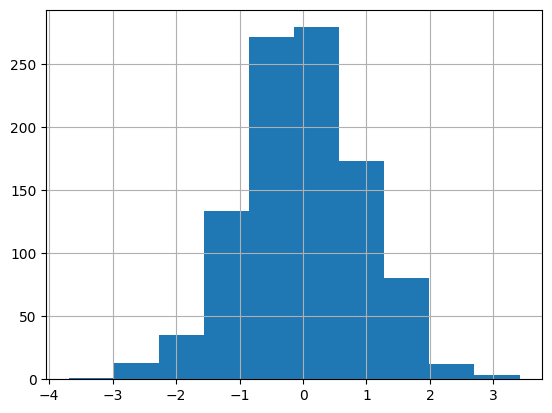

In [7]:
df1['A'].hist()

Call the stylesheet. Let's use the **ggplot** theme:

In [8]:
plt.style.use('ggplot')

After applying plt.style.use(**ggplot**):

<Axes: >

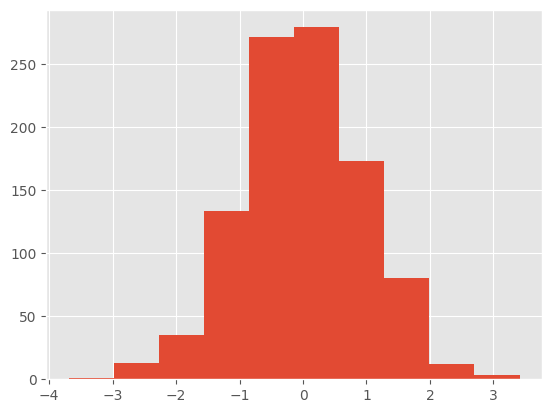

In [9]:
df1['A'].hist()

Now try plt.style.use(**bmh**):

<Axes: >

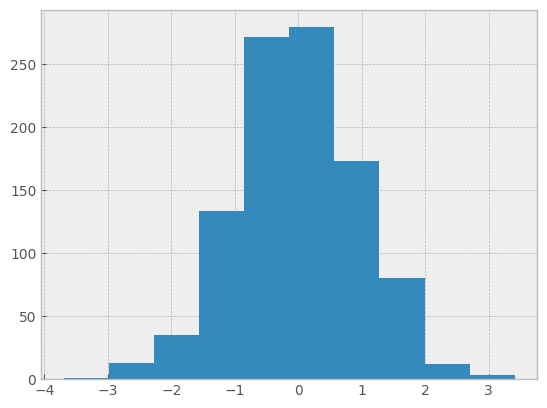

In [10]:
plt.style.use('bmh')
df1['A'].hist()

**fivethirtyeight**

<Axes: >

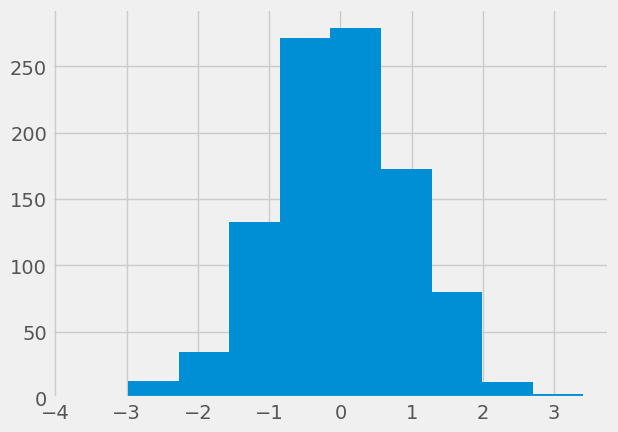

In [11]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

A dark background theme:

<Axes: >

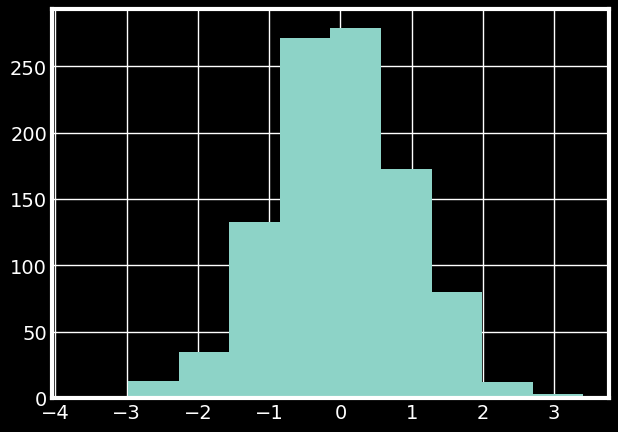

In [12]:
plt.style.use('dark_background')
df1['A'].hist()

Let's stick with the ggplot style for now.

In [13]:
plt.style.use('ggplot')
# plt.style.use('bmh')

## Plot Types

Let's call some of these 11 plot type methods (the key terms shown in the list above, e.g. 'box', 'barh', etc) to see how they work.

In [14]:
### remember the dataframe

df2.head()

a         b         c         d
0  0.039762  0.218517  0.103423  0.957904
1  0.937288  0.041567  0.899125  0.977680
2  0.780504  0.008948  0.557808  0.797510
3  0.672717  0.247870  0.264071  0.444358
4  0.053829  0.520124  0.552264  0.190008

### Area Plot

<Axes: >

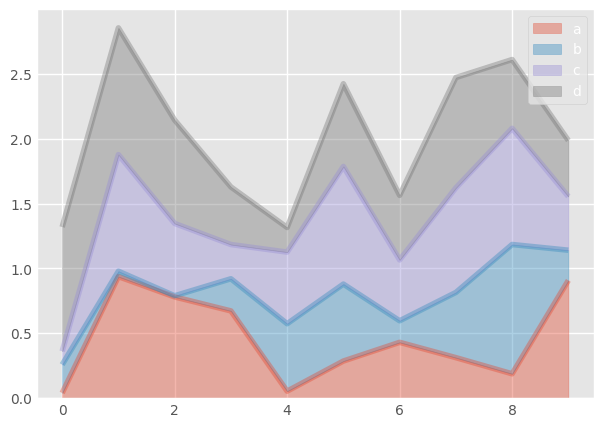

In [15]:
df2.plot.area(alpha=0.4)

### Bar Plots

Bar plots are one of the most common ways to compare categorical data visually. They represent quantities as rectangular bars whose length (or height) corresponds to the value being measured. In Python, these are typically created using *Matplotlib* or *Seaborn*.

Both bar() and barh() create bar charts — the difference is simply orientation. Stacked bar charts, on the other hand, how multiple subcategories contribute to a total within each main category.  

| Plot Type       | Orientation | Purpose                                  | Best For                                |
| --------------- | ----------- | ---------------------------------------- | --------------------------------------- |
| **Bar Plot**    | Vertical    | Compare category values                  | Simple category comparisons             |
| **Barh Plot**   | Horizontal  | Compare category values with long labels | Readability and ranking-type data       |
| **Stacked Bar** | Either      | Show part-to-whole relationships         | Composition of totals across categories |



#### Vertical Bar Plot

<Axes: >

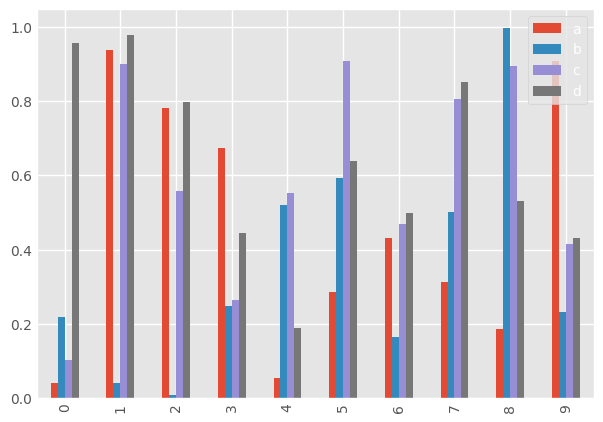

In [16]:
### bar plot

df2.plot.bar()

#### Horizontal Bar Plot 

<Axes: >

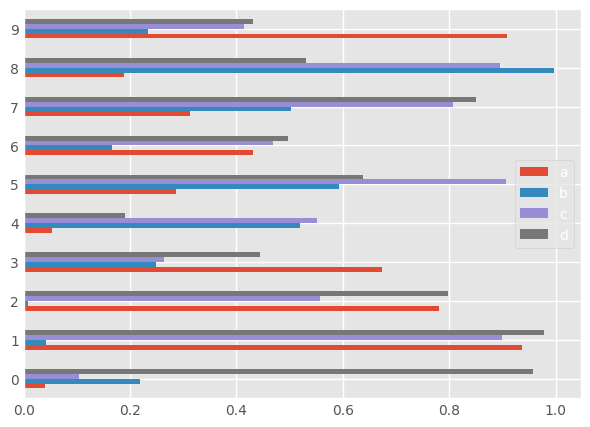

In [17]:
### bar plot horizontal

df2.plot.barh()

<Axes: >

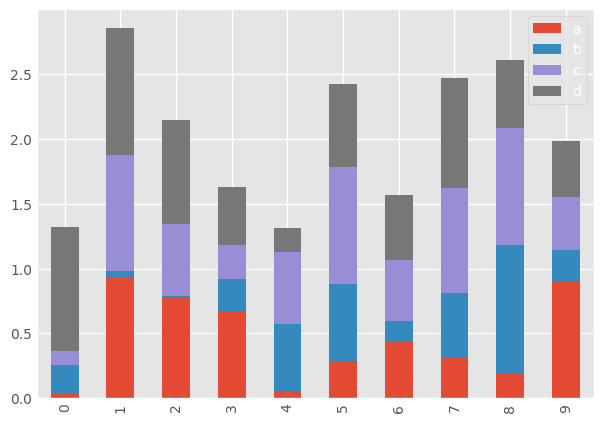

In [18]:
### bar plot stacked

df2.plot.bar(stacked=True)

### Histograms

<Axes: ylabel='Frequency'>

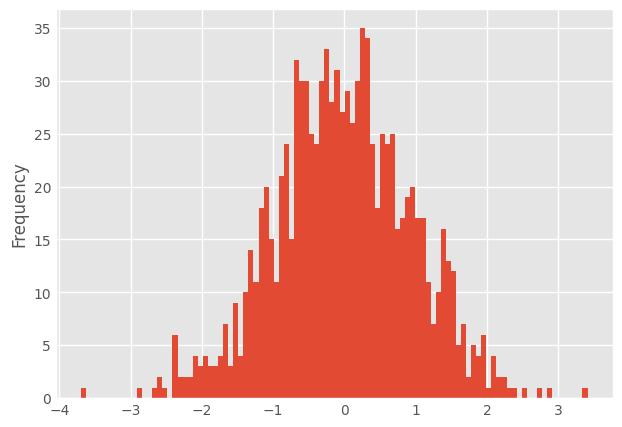

In [19]:
df1['A'].plot.hist(bins=100)

### Line Plots

<Axes: >

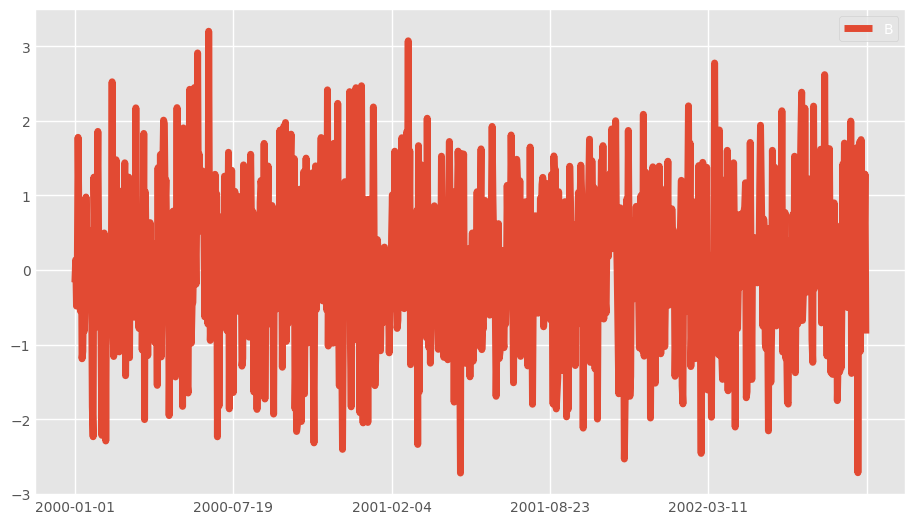

In [20]:
# df1.plot.line(x=df1.index, y='B',figsize=(12,3),lw=1)

df1.plot.line(y='B',figsize=(10,6),lw=5)

### Scatter Plots

<Axes: xlabel='A', ylabel='B'>

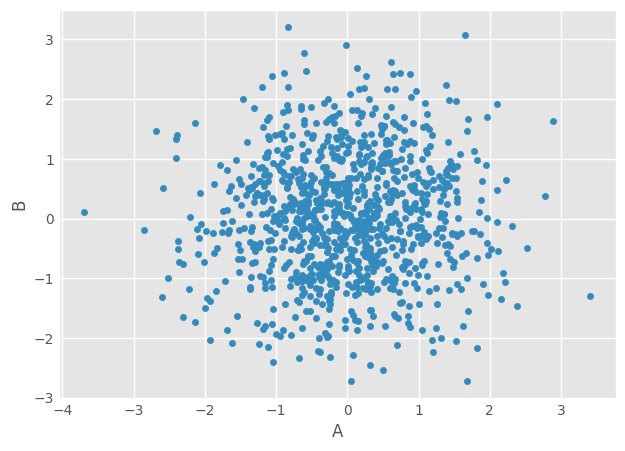

In [21]:
df1.plot.scatter(x='A',y='B')

## Color Maps
- You can use **c** to color based off another column value. 
- Use **cmap** to indicate colormap to use. 
- For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

<Axes: xlabel='A', ylabel='B'>

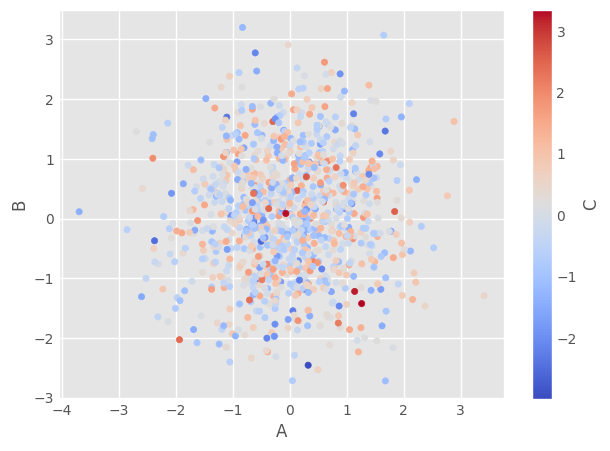

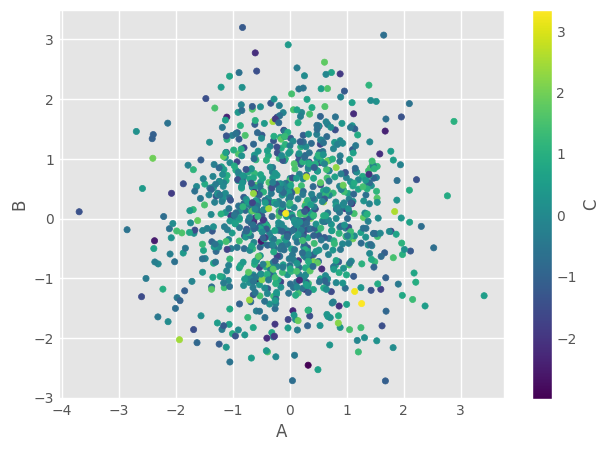

In [22]:
### the color of each point corresponds to the values in column C
### try them out

# df1.plot.scatter(x=df1['A'], y=df1['B'], c=df1['C'], cmap='coolwarm')  ### need to use x='A' instead of x=df1['A']
df1.plot.scatter(x='A', y='B', c='C', cmap='coolwarm')       ### color value from 'C'; colormap
df1.plot.scatter(x='A', y='B', c='C', cmap='viridis')      ### another colormap

## Size

Or use s to indicate size based off another column. s parameter needs to be an array, not just the name of a column:

/Users/tcn85/workspace/dsm/.venv/lib/python3.13/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: xlabel='A', ylabel='B'>

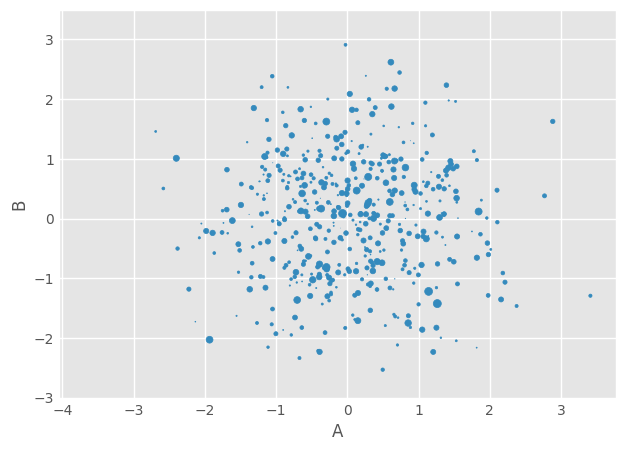

In [23]:
### try different sizes

# df1.plot.scatter(x='A', y='B', s=df1['C']*200)
df1.plot.scatter(x='A',y='B',s=df1['C']*10)

### BoxPlots

<Axes: >

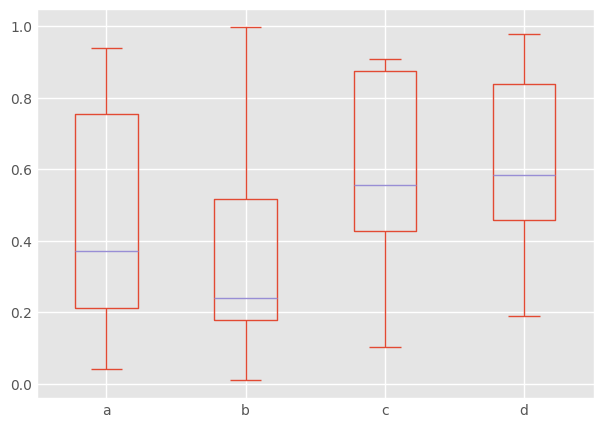

In [24]:
df2.plot.box() # Can also pass a by= argument for groupby

### Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

<Axes: xlabel='a', ylabel='b'>

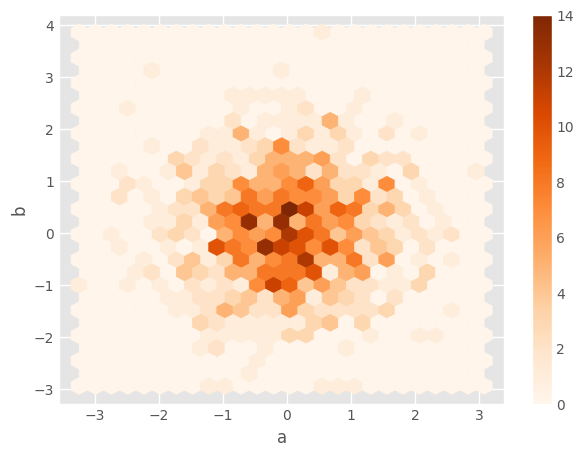

In [25]:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='Oranges')

### Kernel Density Estimation (KDE) Plot

- A smooth version of histogram

Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='Density'>

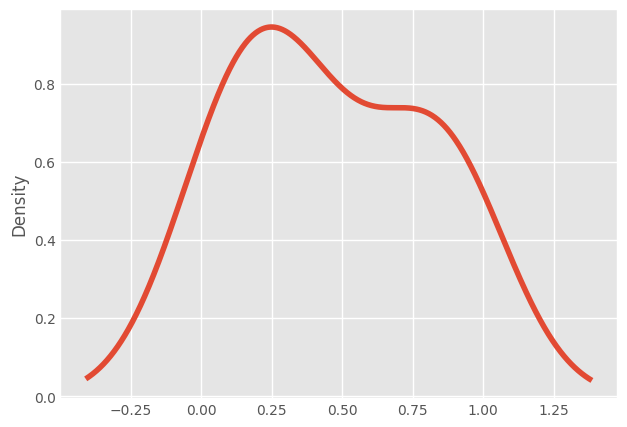

In [26]:
%pip install scipy    ### ensure scipy is installed; uncomment when done

df2['a'].plot.kde()

### Density/KDE Plot

<Axes: ylabel='Density'>

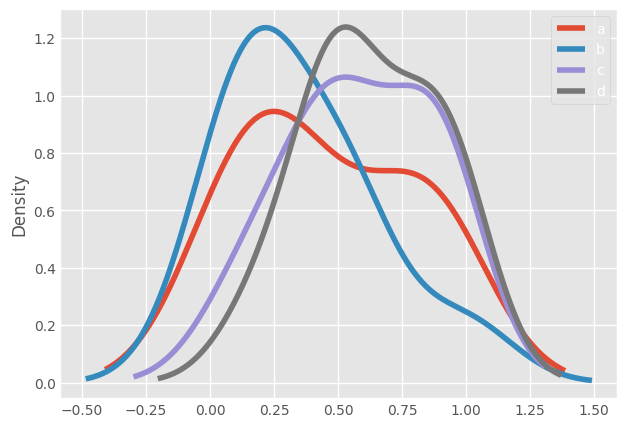

In [27]:
df2.plot.density()

Using density plot as an example of how Pandas visualization differs from Matplotlib and Seaborn:

| Library                | Function                | Notes                       |
| ---------------------- | ----------------------- | --------------------------- |
| **Seaborn**            | `sns.kdeplot()`         | most common, easy to use    |
| **Pandas**             | `.plot(kind="density")` | convenient for quick plots  |
| **Matplotlib + SciPy** | `gaussian_kde()`        | manual control over details |


The end.